In [170]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import seaborn as sns
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.inspection import permutation_importance
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import accuracy_score

In [171]:
df=pd.read_csv("/content/tips (data for regression problem).csv")

In [172]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [173]:
df.isnull().sum()  #Checking for null values

,0
total_bill,0
tip,0
sex,0
smoker,0
day,0
time,0
size,0


In [174]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [175]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [176]:
categorical_columns=['sex','smoker','day','time','size']
numerical_columns=['total_bill','tip']

In [177]:
# Printing all the unique values of every categorical column
for x in categorical_columns:
  print(x)
  print(df[x].unique())

sex
['Female' 'Male']
smoker
['No' 'Yes']
day
['Sun' 'Sat' 'Thur' 'Fri']
time
['Dinner' 'Lunch']
size
[2 3 4 1 6 5]


<Axes: xlabel='total_bill', ylabel='tip'>

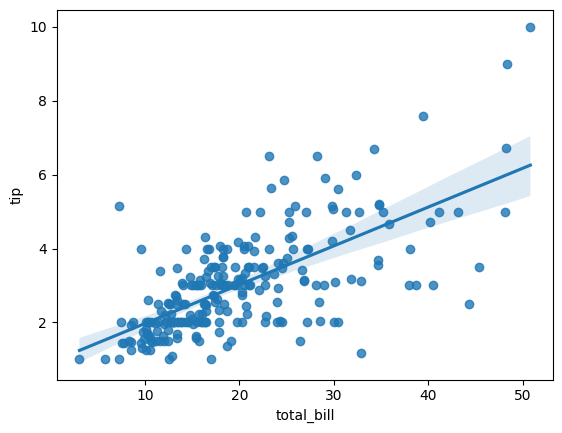

In [178]:
# Scatter plot for seeing the relationship between total_bill and tip.
sns.regplot(x='total_bill',y='tip',data=df)

Plotting the average tip by day

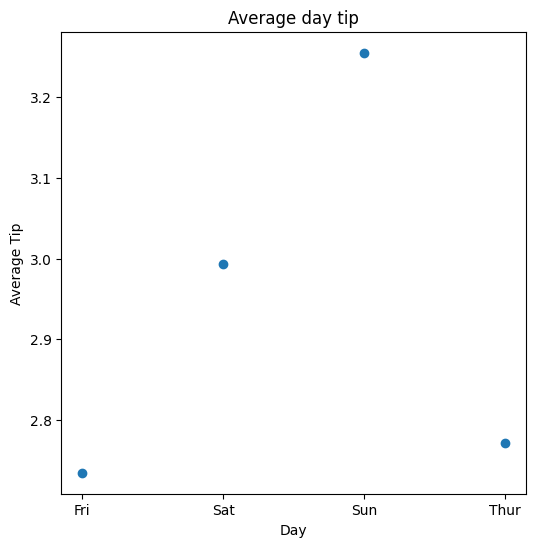

In [179]:

average_day_tip = df.groupby('day')['tip'].mean().reset_index()
plt.figure(figsize=(6, 6))
plt.plot(average_day_tip['day'] , average_day_tip['tip'] , 'o')
plt.title('Average day tip')
plt.xlabel('Day')
plt.ylabel('Average Tip')
plt.show()

Seeing how many male and female smokers are present.

<Axes: xlabel='sex', ylabel='count'>

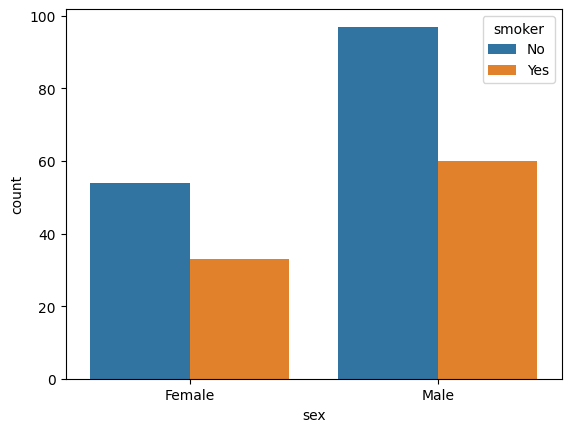

In [180]:
sns.countplot(x='sex',data=df,hue='smoker')

<Axes: xlabel='day', ylabel='count'>

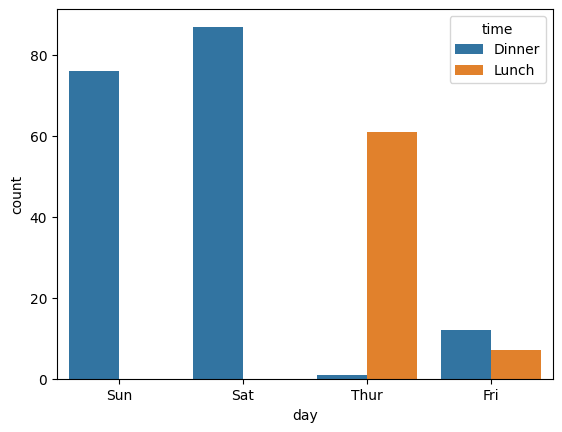

In [181]:
sns.countplot(x='day',data=df,hue='time')

People usually prefer dinner on weekends and lunch on week days.


<Axes: xlabel='size', ylabel='count'>

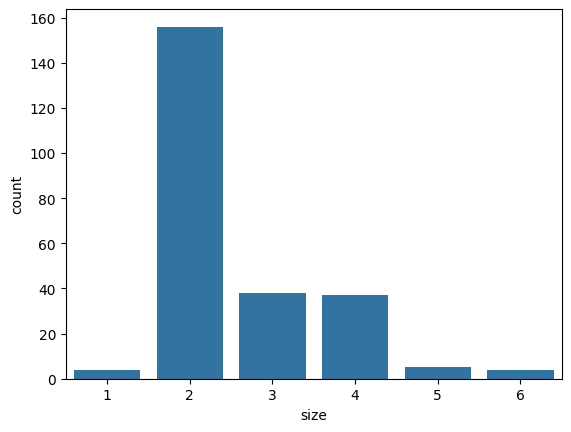

In [182]:
sns.countplot(x='size',data=df)

This graph shows the count of families and their number of members.

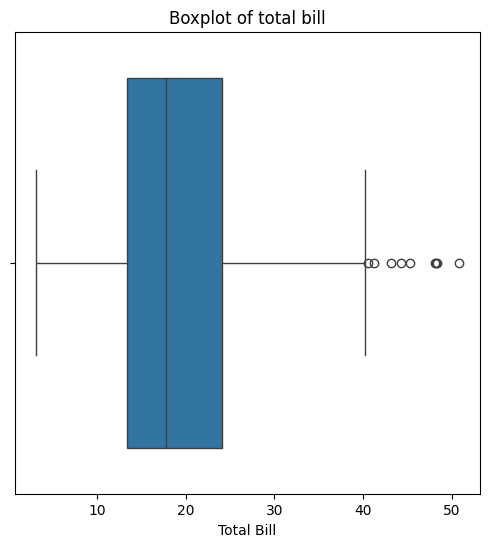

In [183]:
plt.figure(figsize=(6, 6))
sns.boxplot(x=df["total_bill"])
plt.title("Boxplot of total bill")
plt.xlabel("Total Bill")
plt.show()

<Axes: xlabel='total_bill', ylabel='Density'>

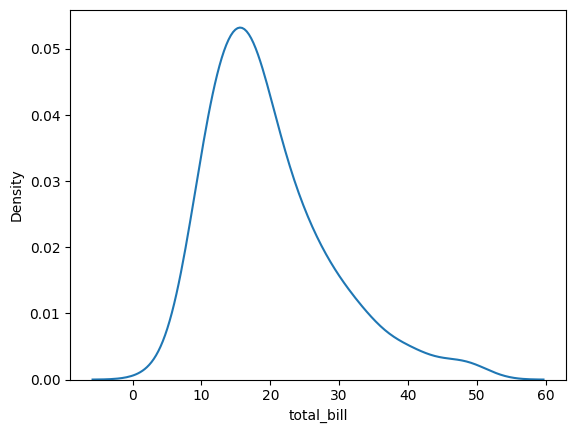

In [184]:
sns.kdeplot(df['total_bill'])

The total bill data is normally distributed!

<Axes: xlabel='tip', ylabel='Density'>

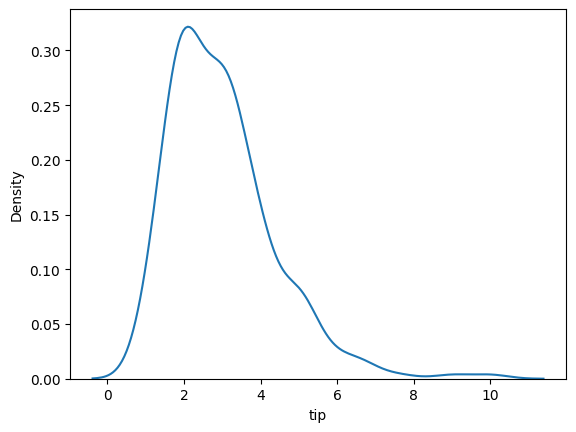

In [185]:
sns.kdeplot(df['tip'])

Tip data is also normally distributed.

In [186]:
# For encoding categorical values
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for x in categorical_columns:
  df[x]=le.fit_transform(df[x])

<Axes: >

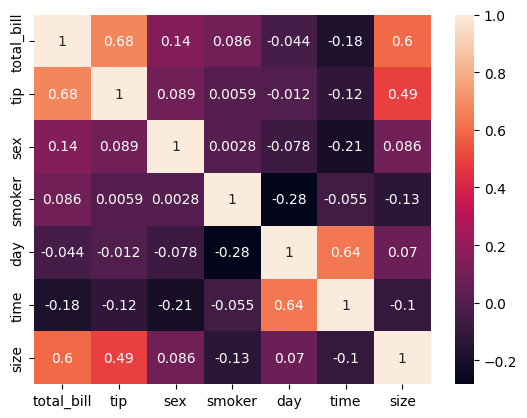

In [187]:
corr_matrix=df.corr()
sns.heatmap(corr_matrix,annot=True)


Here we can clearly see that total bill and size are strongly correlated with tip.

In [188]:
from scipy import stats
for col in categorical_columns:
    groups = [df['tip'][df[col] == category] for category in df[col].unique()]
    f_stat, p_value = stats.f_oneway(*groups)

    print(f'ANOVA test for {col}:')
    print(f'F-Statistic: {f_stat}, p-value: {p_value}')


    if p_value < 0.05:
        print(f"Result: Significant difference in tip based on '{col}'\n")
    else:
        print(f"Result: No significant difference in tip based on '{col}'\n")


ANOVA test for sex:
F-Statistic: 1.9261545619320046, p-value: 0.166456235034572
Result: No significant difference in tip based on 'sex'

ANOVA test for smoker:
F-Statistic: 0.008506013551529044, p-value: 0.926593152224447
Result: No significant difference in tip based on 'smoker'

ANOVA test for day:
F-Statistic: 1.6723551980998697, p-value: 0.1735885553040592
Result: No significant difference in tip based on 'day'

ANOVA test for time:
F-Statistic: 3.6338154836314573, p-value: 0.05780153475171573
Result: No significant difference in tip based on 'time'

ANOVA test for size:
F-Statistic: 15.746330672727057, p-value: 2.1694633916208174e-13
Result: Significant difference in tip based on 'size'



In [189]:
X=df[['total_bill','size']]
y=df['tip']

In [190]:
from sklearn.model_selection import train_test_split

In [191]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [192]:
lr=LinearRegression()
lr.fit(X_train,y_train)
print(r2_score(y_test,lr.predict(X_test)))

0.4811084097989492


In [193]:
from sklearn.linear_model import Lasso
lasso=Lasso(alpha=0.2)
lasso.fit(X_train,y_train)
print(r2_score(y_test,lasso.predict(X_test)))

0.5472470738939222


In [194]:
from sklearn.linear_model import Ridge
ridge=Ridge(alpha=0.1)
ridge.fit(X_train,y_train)
print(r2_score(y_test,ridge.predict(X_test)))

0.4811866269989803


In [195]:
rf=RandomForestRegressor()
rf.fit(X_train,y_train)
print(r2_score(y_test,rf.predict(X_test)))

0.36395098635349044


In [196]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
}

rf = RandomForestRegressor()
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='r2')
grid_search.fit(X_train, y_train)
print(f'Best Parameters: {grid_search.best_params_}')
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)

print(f'R² Score with Best Hyperparameters: {r2_score(y_test, y_pred)}')


Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best Parameters: {'max_depth': None, 'min_samples_split': 10, 'n_estimators': 200}
R² Score with Best Hyperparameters: 0.335880880668993


In [197]:
svr=SVR()
svr.fit(X_train,y_train)
print(r2_score(y_test,svr.predict(X_test)))

0.5734686986577826


In [198]:
pip install optuna

In [199]:
import optuna
def objective(trial):
    C = trial.suggest_loguniform('C', 1e-2, 1e2)
    kernel = trial.suggest_categorical('kernel', ['linear', 'rbf'])
    gamma = trial.suggest_categorical('gamma', ['scale', 'auto'])
    epsilon = trial.suggest_uniform('epsilon', 0.01, 0.5)
    model = SVR(C=C, kernel=kernel, gamma=gamma, epsilon=epsilon)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return r2_score(y_test, y_pred)

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)
print(f'Best Hyperparameters: {study.best_params}')
print(f'Best R² Score: {study.best_value}')


[I 2024-11-10 16:02:51,603] A new study created in memory with name: no-name-073946a5-e206-4105-9a90-cb57e58f3fc6
<ipython-input-199-909d2d4057a7>:3: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 1e-2, 1e2)
<ipython-input-199-909d2d4057a7>:6: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  epsilon = trial.suggest_uniform('epsilon', 0.01, 0.5)
[I 2024-11-10 16:02:51,614] Trial 0 finished with value: 0.49596896890018294 and parameters: {'C': 0.01916581361352423, 'kernel': 'linear', 'gamma': 'scale', 'epsilon': 0.30744439453828526}. Best is trial 0 with value: 0.49596896890018294.
<ipython-input-199-909d2d4057a7>:3: FutureWarning: suggest_loguniform has been 

Best Hyperparameters: {'C': 1.3010421412522655, 'kernel': 'rbf', 'gamma': 'scale', 'epsilon': 0.06321404334528095}
Best R² Score: 0.5718908570517163


Best Hyperparameters SVR: {'C': 0.010459952746615446, 'kernel': 'linear', 'gamma': 'scale', 'epsilon': 0.4987156885175518}

Best R² Score: 0.5169709025398859

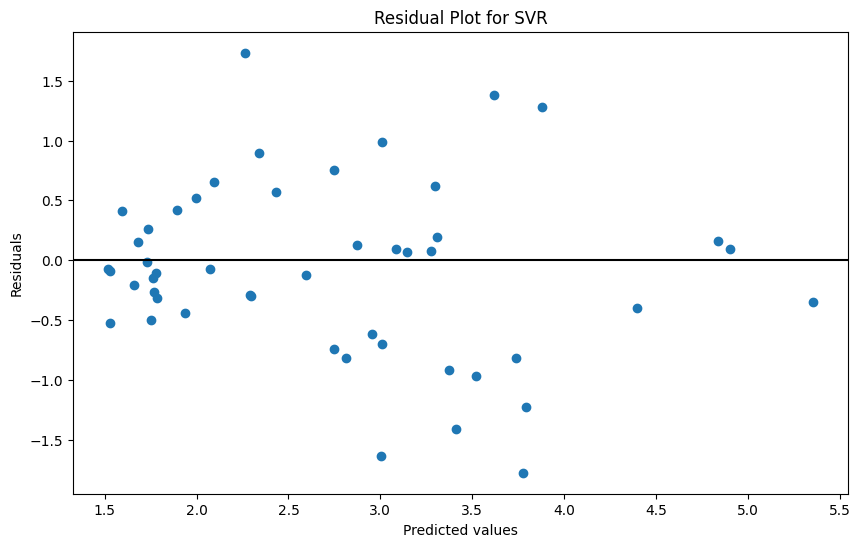

In [200]:
best_model = SVR(**study.best_params)
best_model.fit(X_train, y_train)
y_pred_best = best_model.predict(X_test)
residuals = y_test - y_pred_best
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_best, residuals)
plt.axhline(0,color='black')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title('Residual Plot for SVR')
plt.show()

In [201]:
knn=KNeighborsRegressor()
knn.fit(X_train,y_train)
print(r2_score(y_test,knn.predict(X_test)))

0.40844253722501


In [202]:
def objective(trial):
    n_neighbors = trial.suggest_int('n_neighbors', 1, 50)
    weights = trial.suggest_categorical('weights', ['uniform', 'distance'])
    metric = trial.suggest_categorical('metric', ['euclidean', 'manhattan', 'chebyshev'])
    p = trial.suggest_int('p', 1, 2)
    model = KNeighborsRegressor(n_neighbors=n_neighbors, weights=weights, metric=metric, p=p)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return r2_score(y_test, y_pred)
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)
print(f"Best hyperparameters: {study.best_params}")
print(f"Best R² score: {study.best_value}")

[I 2024-11-10 16:02:54,006] A new study created in memory with name: no-name-140c9c76-c9c3-40d6-86fe-0fe06baa10ad
[I 2024-11-10 16:02:54,015] Trial 0 finished with value: 0.5095952521094028 and parameters: {'n_neighbors': 25, 'weights': 'uniform', 'metric': 'euclidean', 'p': 2}. Best is trial 0 with value: 0.5095952521094028.
[I 2024-11-10 16:02:54,022] Trial 1 finished with value: 0.49784851579558276 and parameters: {'n_neighbors': 30, 'weights': 'distance', 'metric': 'chebyshev', 'p': 1}. Best is trial 0 with value: 0.5095952521094028.
[I 2024-11-10 16:02:54,030] Trial 2 finished with value: 0.5233624951512754 and parameters: {'n_neighbors': 43, 'weights': 'uniform', 'metric': 'chebyshev', 'p': 1}. Best is trial 2 with value: 0.5233624951512754.
[I 2024-11-10 16:02:54,039] Trial 3 finished with value: 0.4514960395832952 and parameters: {'n_neighbors': 10, 'weights': 'distance', 'metric': 'manhattan', 'p': 1}. Best is trial 2 with value: 0.5233624951512754.
[I 2024-11-10 16:02:54,048]

Best hyperparameters: {'n_neighbors': 38, 'weights': 'uniform', 'metric': 'manhattan', 'p': 2}
Best R² score: 0.5456789888284403


Best hyperparameters KNN Regressor: {'n_neighbors': 38, 'weights': 'uniform', 'metric': 'manhattan', 'p': 2}

Best R² score: 0.5456789888284403


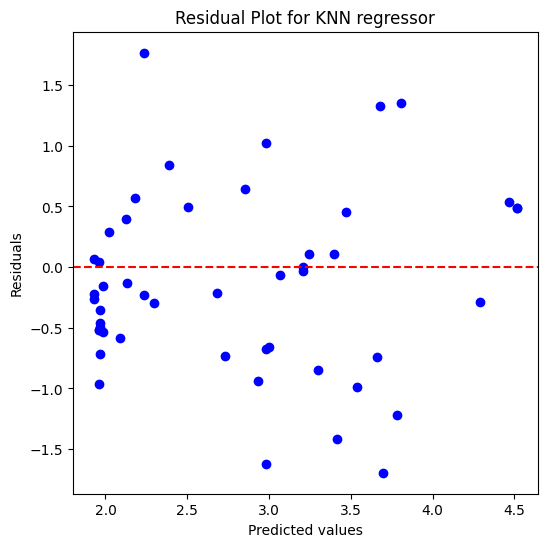

In [203]:
best_model = KNeighborsRegressor(**study.best_params)
best_model.fit(X_train, y_train)
y_pred_best = best_model.predict(X_test)
residuals = y_test - y_pred_best
plt.figure(figsize=(6, 6))
plt.scatter(y_pred_best, residuals, color='blue')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title('Residual Plot for KNN regressor')
plt.show()

In [204]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()
dt.fit(X_train,y_train)
print(r2_score(y_test,dt.predict(X_test)))

0.18183757115365107


In [205]:
def objective(trial):
    max_depth = trial.suggest_int('max_depth', 1, 30)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 20)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 20)
    max_features = trial.suggest_categorical('max_features', ['sqrt', 'log2', None])
    model = DecisionTreeRegressor(
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        max_features=max_features,
        random_state=42
    )
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return r2_score(y_test, y_pred)
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)
print(f"Best hyperparameters: {study.best_params}")
print(f"Best R² score: {study.best_value}")

[I 2024-11-10 16:02:55,256] A new study created in memory with name: no-name-a6c0e149-845c-43d8-9965-32346adb6843
[I 2024-11-10 16:02:55,264] Trial 0 finished with value: 0.40011174575212594 and parameters: {'max_depth': 11, 'min_samples_split': 12, 'min_samples_leaf': 13, 'max_features': 'log2'}. Best is trial 0 with value: 0.40011174575212594.
[I 2024-11-10 16:02:55,270] Trial 1 finished with value: 0.13120852120195592 and parameters: {'max_depth': 11, 'min_samples_split': 6, 'min_samples_leaf': 2, 'max_features': None}. Best is trial 0 with value: 0.40011174575212594.
[I 2024-11-10 16:02:55,277] Trial 2 finished with value: 0.4691988503652421 and parameters: {'max_depth': 30, 'min_samples_split': 10, 'min_samples_leaf': 19, 'max_features': None}. Best is trial 2 with value: 0.4691988503652421.
[I 2024-11-10 16:02:55,285] Trial 3 finished with value: 0.3895124395201274 and parameters: {'max_depth': 22, 'min_samples_split': 3, 'min_samples_leaf': 8, 'max_features': 'sqrt'}. Best is tr

Best hyperparameters: {'max_depth': 13, 'min_samples_split': 19, 'min_samples_leaf': 16, 'max_features': None}
Best R² score: 0.4789667033177817


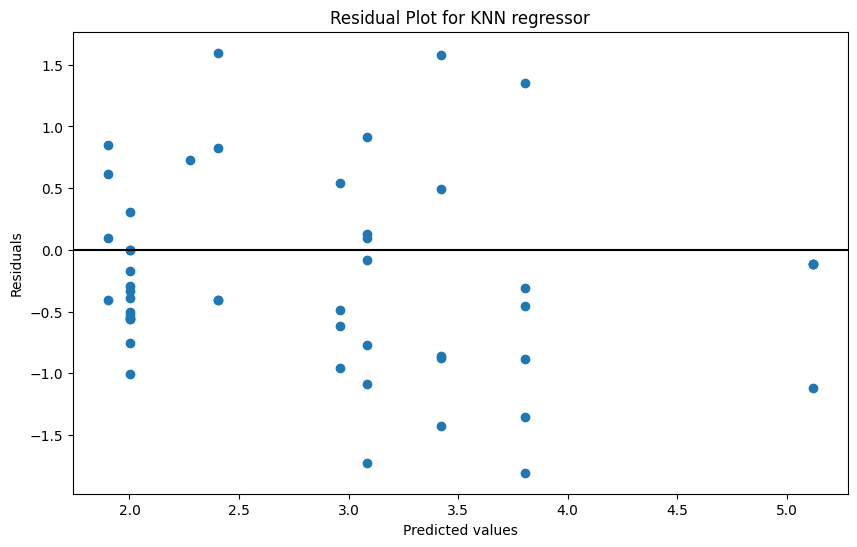

In [206]:
best_model = DecisionTreeRegressor(**study.best_params)
best_model.fit(X_train, y_train)
y_pred_best = best_model.predict(X_test)
residuals = y_test - y_pred_best
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_best, residuals)
plt.axhline(0, color='black')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title('Residual Plot for KNN regressor')
plt.show()

Best hyperparameters for Decision Tree: {'max_depth': 18, 'min_samples_split':15, 'min_samples_leaf': 16, 'max_features': None}


Best R² score: 0.4789667033177817

##Best Regressor Model is SVR  with r2 score of 0.5734686986577826